- **This work is done in python environment and not pyspark.**
- **Load data into pandas dataframe**


In [1]:
import pandas as pd
# Load data into pandas DataFrame from "/lakehouse/default/Files/WA_Fn-UseC_-Telco-Customer-Churn.csv"
telco_base_data = pd.read_csv("/lakehouse/default/Files/WA_Fn-UseC_-Telco-Customer-Churn.csv")
display(telco_base_data)


StatementMeta(, ff0edbb9-2fe4-4487-99b6-183c682db9dd, 3, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 847e6ea1-dd5b-4a9f-ae76-756499a18cdf)

In [2]:
#Show the first 5 rows

telco_base_data.head(5)



StatementMeta(, ff0edbb9-2fe4-4487-99b6-183c682db9dd, 4, Finished, Available, Finished)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Import necessary python Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline



StatementMeta(, ff0edbb9-2fe4-4487-99b6-183c682db9dd, 5, Finished, Available, Finished)

In [4]:
#Check number of rows and column in the dataframe

telco_base_data.shape



StatementMeta(, ff0edbb9-2fe4-4487-99b6-183c682db9dd, 6, Finished, Available, Finished)

(7043, 21)

**Result:** The telco_base_data has 7043 rows and 21 columns as shown by the reuslt above.

In [5]:
#Show all columns in the pandas dataframe

telco_base_data.columns.values 



StatementMeta(, ff0edbb9-2fe4-4487-99b6-183c682db9dd, 7, Finished, Available, Finished)

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

**Result :** Array showing list of columns in telco_base_data as shown by the result above.

In [6]:
 #Determing data type for each column

telco_base_data.dtypes


StatementMeta(, ff0edbb9-2fe4-4487-99b6-183c682db9dd, 8, Finished, Available, Finished)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

On investigating the data type of each column shown above, it was discovered that the [TotalCharges] column is presented as object instead of float.


In [7]:
# convert [TotalCharges] from string to double.

telco_base_data['TotalCharges'] = pd.to_numeric(telco_base_data['TotalCharges'], errors = 'coerce')


StatementMeta(, ff0edbb9-2fe4-4487-99b6-183c682db9dd, 9, Finished, Available, Finished)

##### ***The dataset is grouped into Features(independent variables) and Label(dependent variables). The Features can further be sub-divided as 'Category' values and 'Numerical' values.


In [8]:
 # Check descriptive statistics of numerical variables

telco_base_data.describe()



StatementMeta(, ff0edbb9-2fe4-4487-99b6-183c682db9dd, 10, Finished, Available, Finished)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
# Count the number of churners as against number of active accounts.

telco_base_data['Churn'].value_counts()


StatementMeta(, ff0edbb9-2fe4-4487-99b6-183c682db9dd, 11, Finished, Available, Finished)

Churn
No     5174
Yes    1869
Name: count, dtype: int64


**Insights from descriptive statistics:**
```
1. That the total number of subscribers of ABC_Telecom is 7043.

2. The maximum tenure a customer has stayed with the ABC_Telecom is 72 months and the average tenure of customers is 32.4 months.

3. 75% of the subscribers have spent less than 55 month with the company, 50% of the subscribers have spent less than 29 months with the company.

4. That the average monthly charges per customer is 64.67 USD and only 25% of the customers spent more than 89.85 USD per month.

5. That the average total charges in period under review 2283.30 USD and 75% of customers spent less than 3794.74 USD.
```



In [10]:
telco_base_data['Churn'].value_counts()

StatementMeta(, ff0edbb9-2fe4-4487-99b6-183c682db9dd, 12, Finished, Available, Finished)

Churn
No     5174
Yes    1869
Name: count, dtype: int64

###### **Result:** 
- That from a total number of 7043 subscribers, 5174 are active subscribers and 1869 are churners(inactive account).

- In % terms, 73.46% of customers have active account with ABC_Telecom while 26.53% of customers have churn(left)




StatementMeta(, ff0edbb9-2fe4-4487-99b6-183c682db9dd, 13, Finished, Available, Finished)

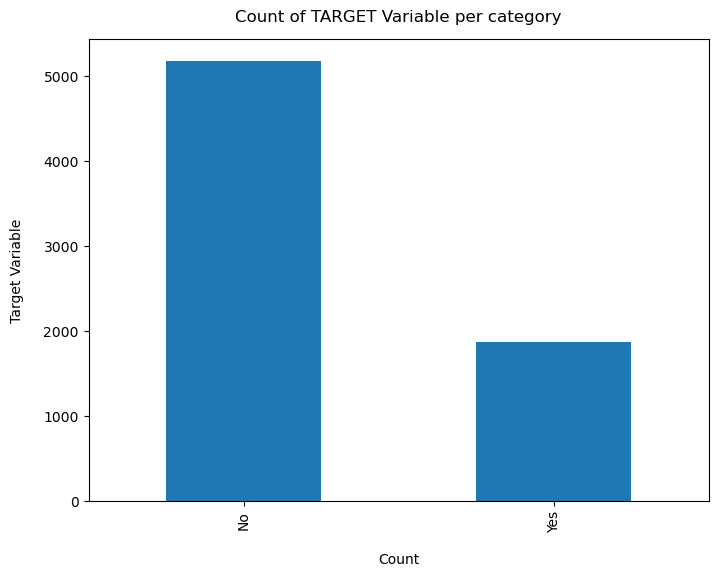

In [11]:
# Plot the number of active account as against inactive(churn) account and plot result in a bar chart.
telco_base_data['Churn'].value_counts().plot(kind='bar', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);



### **Data Cleaning & Preprocessing.**

In [12]:
# Create a copy of the base data for manipulation and processing
telco_data = telco_base_data.copy()


StatementMeta(, ff0edbb9-2fe4-4487-99b6-183c682db9dd, 14, Finished, Available, Finished)

###### Finding the total of null values in each column

In [13]:

#Find the total of all missing values in each column
telco_data.isnull().sum()


StatementMeta(, ff0edbb9-2fe4-4487-99b6-183c682db9dd, 15, Finished, Available, Finished)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**Result:** Each column has zero missing values except [TotalCharge] that has 11 missing values.

In [14]:
# To find specific rows that have null values in ['TotalCharge'] column
telco_data.loc[telco_data ['TotalCharges'].isnull() == True]


StatementMeta(, ff0edbb9-2fe4-4487-99b6-183c682db9dd, 16, Finished, Available, Finished)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


StatementMeta(, ff0edbb9-2fe4-4487-99b6-183c682db9dd, 17, Finished, Available, Finished)

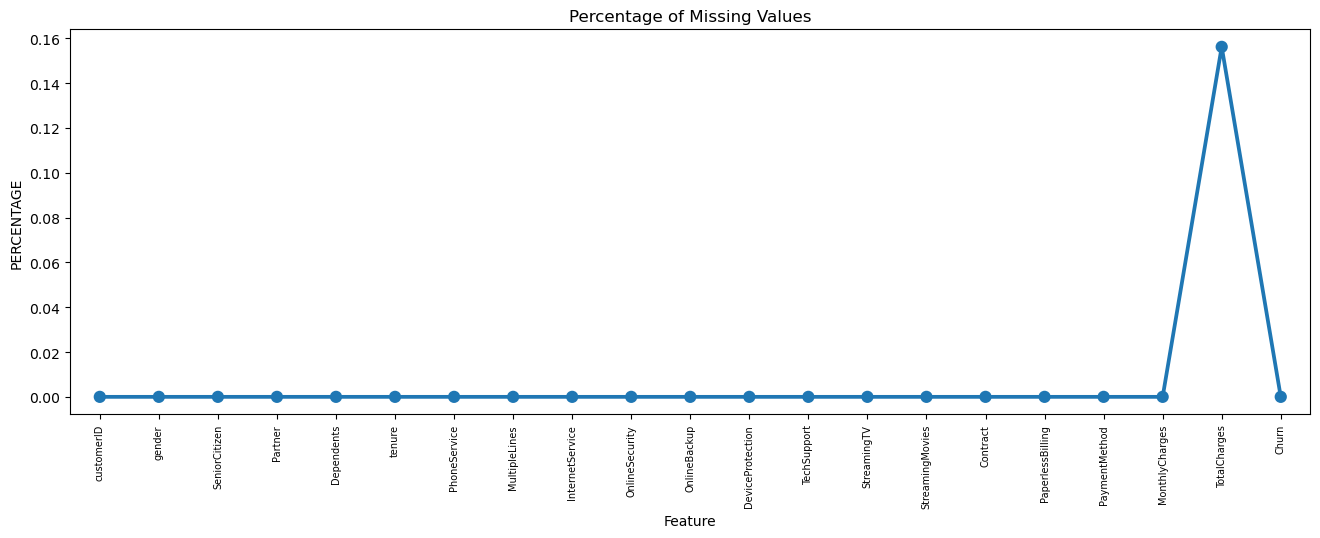

In [15]:
# Plot the % of missing values
missing = pd.DataFrame((telco_base_data.isnull().sum()) * 100 / telco_base_data.shape[0]).reset_index()
missing.columns = ['Feature', 'Percentage']

plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='Feature', y='Percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("PERCENTAGE")
plt.show()


**P.S.**
```
Handling Missing Values:
- For features with less or few missing values- we can use regression to predict the missing values or fill  them with the mean of the values present, or use a moving average depending on the feature.

- For features with very high number of missing values- it is better to drop those columns as they provide little insights on analysis.

- As there 're no rule of thumb on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here, for example, Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.
```

**Result:**

Since the total number of missing value is 11 i.e., 0.15% in % terms compared to the  total records in the  dataset, it is safe to ignore them, by deleting them from further processing.

However, missing values can also be handle by inputting average values, Zero, or moving average etc.


In [16]:
# This code remove any rows with missing value
telco_data.dropna(how = 'any', inplace = True)

# Alternatively, we can fill the  empty field in ['TotalCharge'] column with zero value using this code "telco_data.fillna(0)""


StatementMeta(, ff0edbb9-2fe4-4487-99b6-183c682db9dd, 18, Finished, Available, Finished)

In [17]:
# Calculate the max 'Tenure'
print(telco_data['tenure'].max())


StatementMeta(, ff0edbb9-2fe4-4487-99b6-183c682db9dd, 19, Finished, Available, Finished)

72


**Result:** The maximum tenure of any of the subscriber is 72 months.

In [18]:
#Divide customers into bins or groups based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...
# Group the tenure column in bins of 12 months for ease of analyzing the tenure column

labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

telco_data['tenure_group'] = pd.cut(telco_data.tenure, range(1, 80, 12), right=False, labels=labels)


StatementMeta(, ff0edbb9-2fe4-4487-99b6-183c682db9dd, 20, Finished, Available, Finished)

In [19]:
# Show result
telco_data['tenure_group'].value_counts()


StatementMeta(, ff0edbb9-2fe4-4487-99b6-183c682db9dd, 21, Finished, Available, Finished)

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

In [20]:
#Drop Columns that are insignificant to our analysis.
#drop column customerID and tenure, since we have replace Tenure with Tenure-group

telco_data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
telco_data.head()



StatementMeta(, ff0edbb9-2fe4-4487-99b6-183c682db9dd, 22, Finished, Available, Finished)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


#### **Explorative Data Analysis**

**Univariate analysis:**

**1.** This focuses on single 'feature' in relation to a Label(churn) per time. Let's Plot distribution for individual predictor by Churn.



StatementMeta(, ff0edbb9-2fe4-4487-99b6-183c682db9dd, 23, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


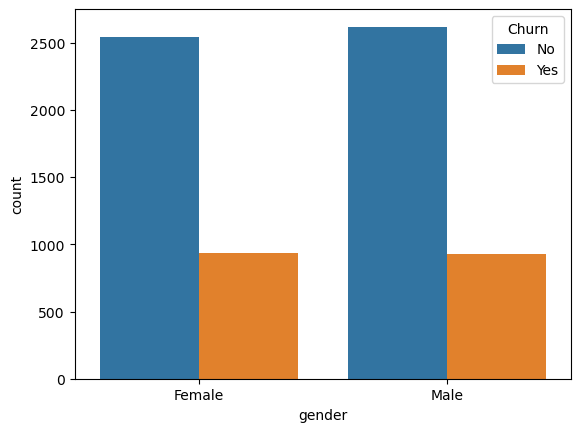

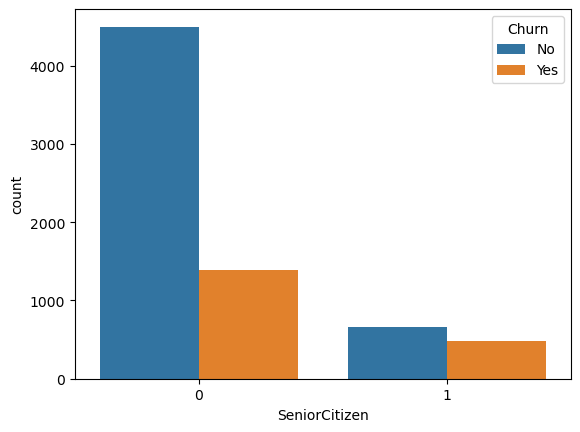

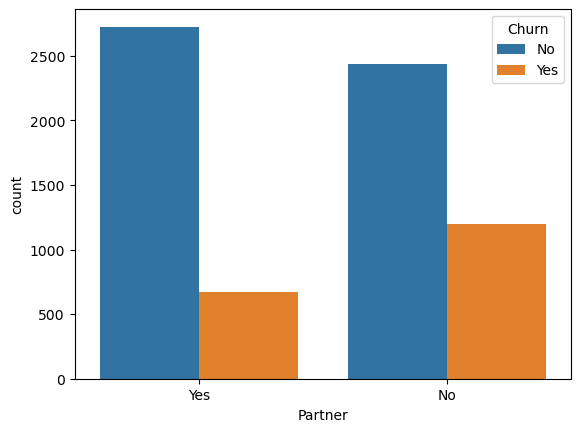

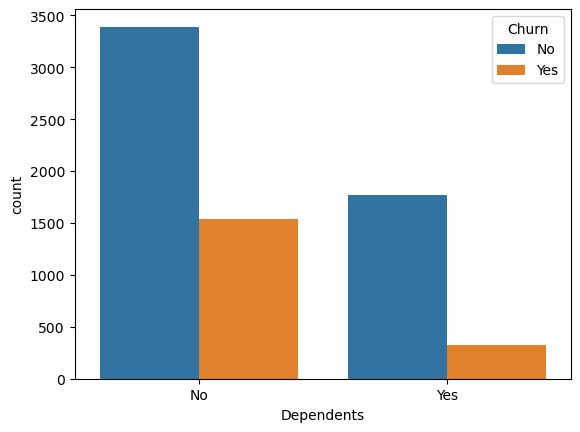

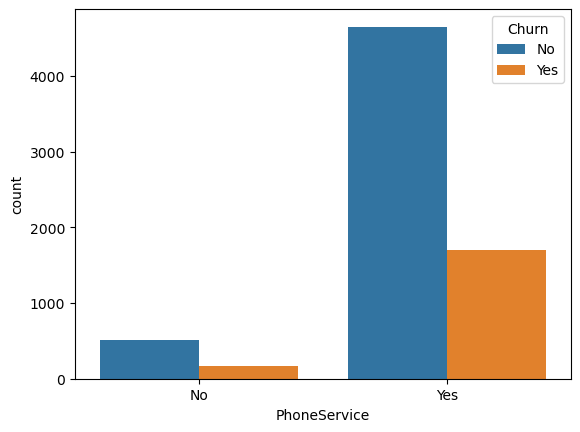

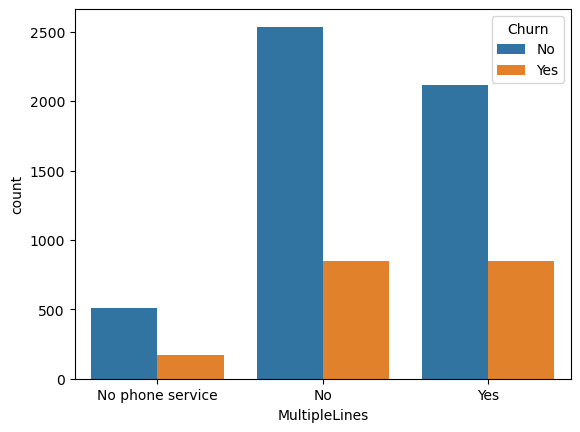

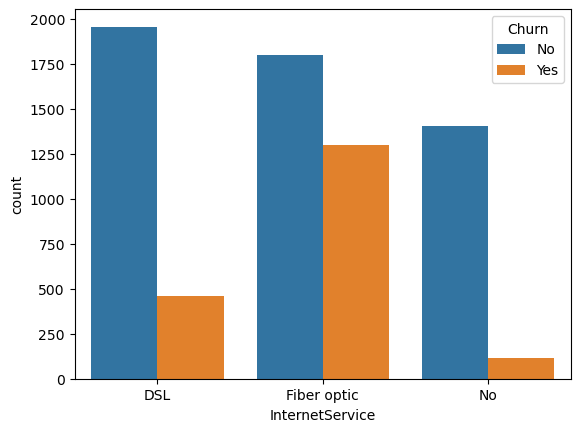

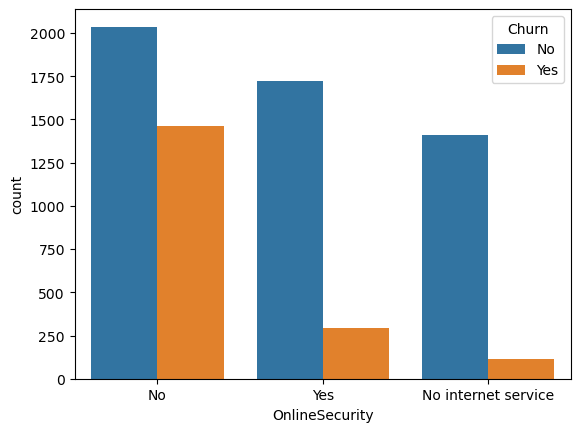

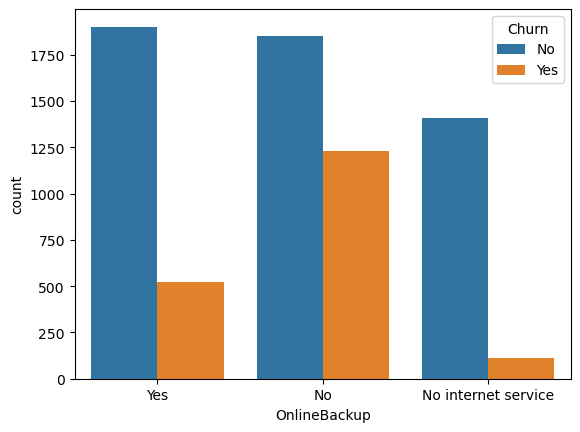

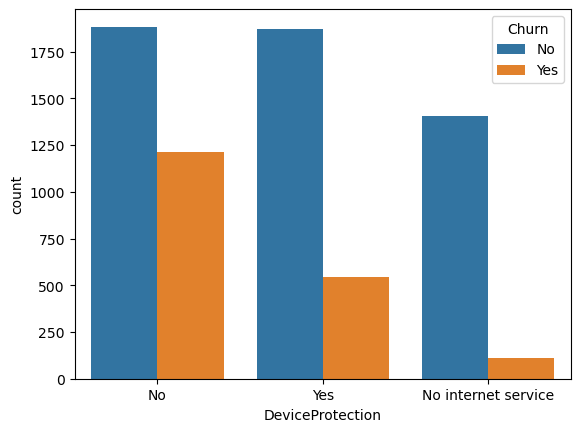

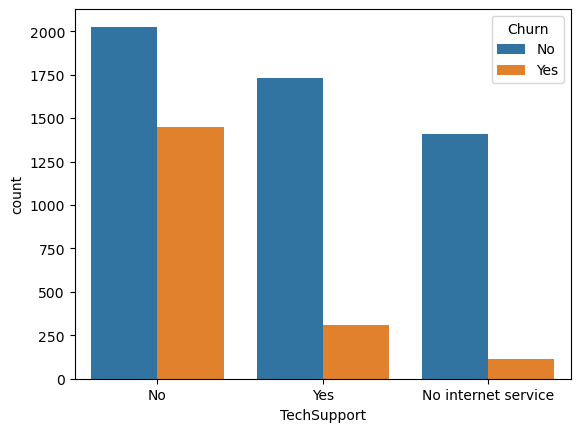

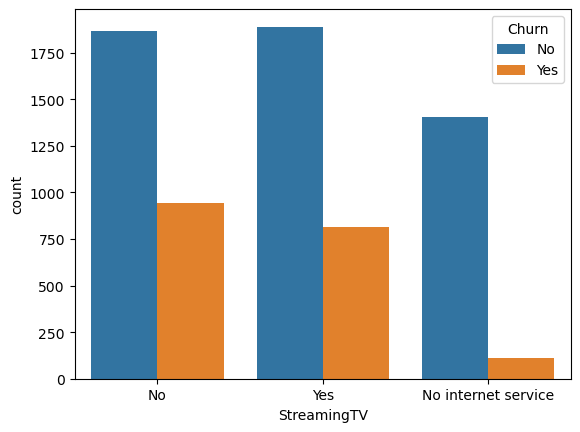

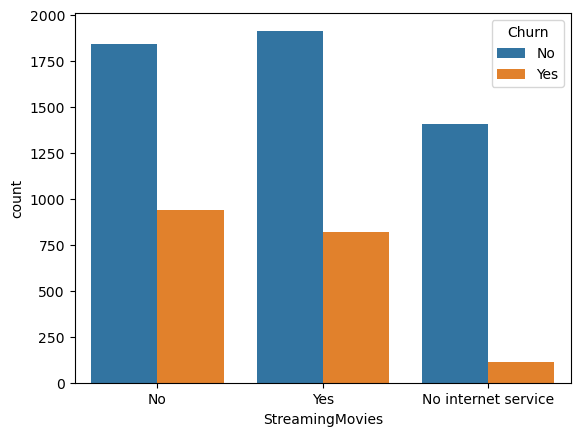

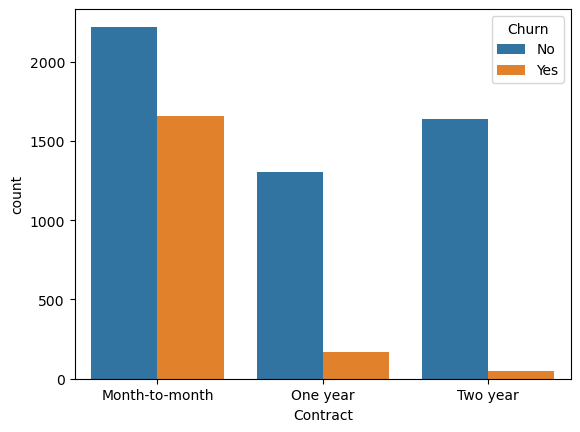

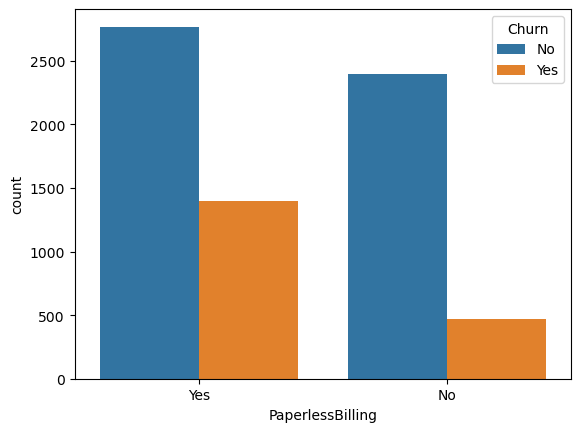

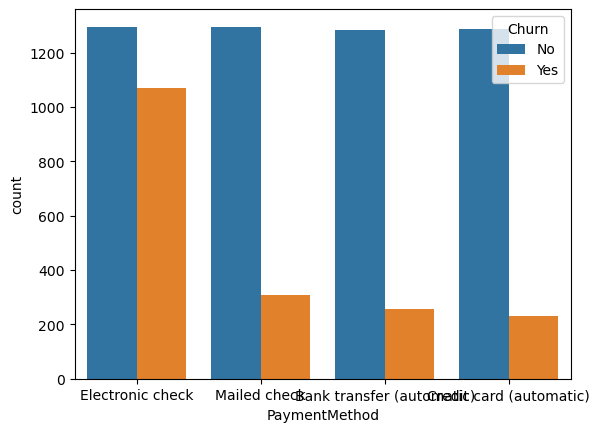

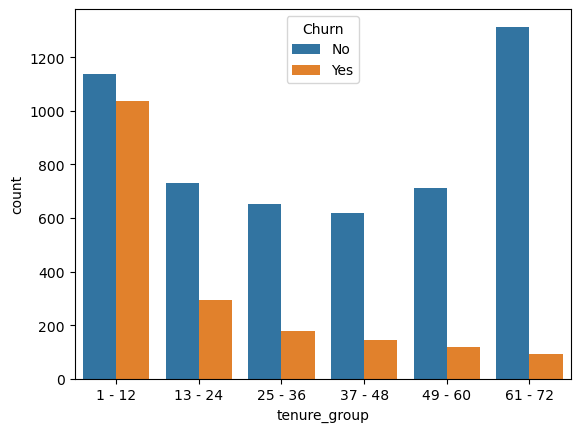

In [21]:
for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data, x=predictor, hue='Churn')


**2.** Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0


In [22]:
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes',1,0)

telco_data.head()


StatementMeta(, ff0edbb9-2fe4-4487-99b6-183c682db9dd, 24, Finished, Available, Finished)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


**3.** Convert all non-numerical variables into dummy variables
```
Label Encoding vs One-Hot Encoding(dummy variables):

Label encoding and one-hot encoding are two common techniques used in machine learning to convert categorical data into numerical data that can be processed by algorithms.

Label Encoding
Label encoding is a simple technique that assigns a unique integer to each category in a categorical variable. It is often used when the categorical variable has an 'ordinal' relationship between its categories (e.g., "low", "medium", "high").
For example:
Gender                 Label Encoding
Male				            0
Female                          1
Trans-gender                    2

By default, the computer will assign more weight to Trans-gender(2) over Female(1), and Female(1) over Male(0). Which is not ideal if vatiables are not ordinal or ranked. The computer assumes that trans-gender is greater than female, and that female is greater than male.-- increasing in value.
Note:Label encoding should only be used on target variable, i.e. Y or dependent variable

One-Hot Encoding is a technique that uses binary vector for each category variable.The vector has a length equal to the number of categories, and only one element in the vector is set to 1, while the rest are set to 0.
For example:
Color          Color_Red  Color_Green   Color_Blue
Red                1		0	           0
Green		       0		1	           0
Blue		       0		0	           1
```

In [23]:
telco_data_dummies = pd.get_dummies(telco_data, dtype=int)
telco_data_dummies.head()

StatementMeta(, ff0edbb9-2fe4-4487-99b6-183c682db9dd, 25, Finished, Available, Finished)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


**4.** Using scatter plot,create a relationship between Monthly Charges and Total Charges

StatementMeta(, ff0edbb9-2fe4-4487-99b6-183c682db9dd, 26, Finished, Available, Finished)

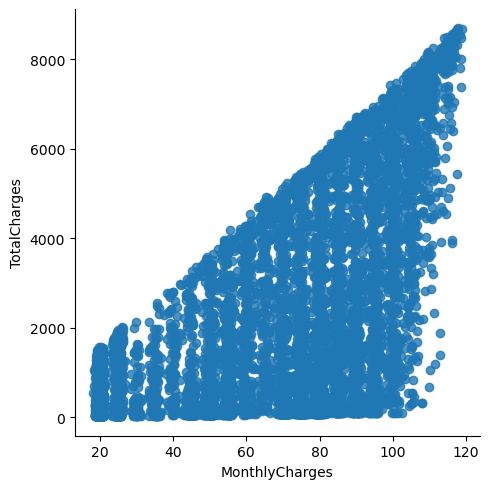

In [24]:
sns.lmplot(data=telco_data_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

**Result:** Total Charges increase as Monthly Charges increase - as expected.

**5.** Churn by Monthly Charges and Total Charges

StatementMeta(, ff0edbb9-2fe4-4487-99b6-183c682db9dd, 27, Finished, Available, Finished)

/tmp/ipykernel_6295/1832435537.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 0) ],
/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_6295/1832435537.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 1) ],
/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_in

Text(0.5, 1.0, 'Monthly charges by churn')

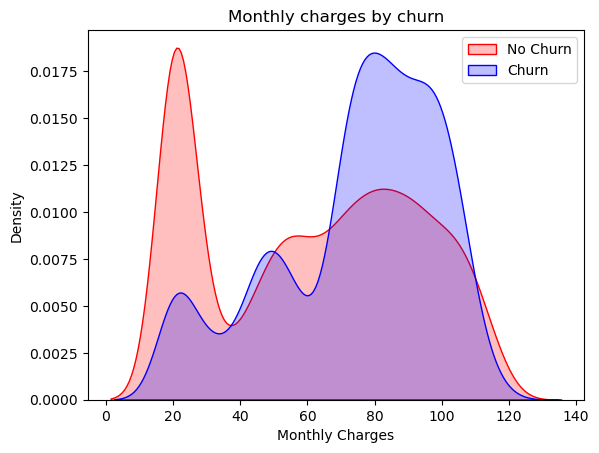

In [25]:
# Distribution of MonthlyCharges for customers who churned and those who didn't.

Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

**Result:** The above graph shows that, Churn is high when Monthly Charges are high

**6.** Using  KDE (Kernel Density Estimate) plot for TotalCharges, comparing customers who have churned versus those who have not, using Seaborn.

StatementMeta(, ff0edbb9-2fe4-4487-99b6-183c682db9dd, 28, Finished, Available, Finished)

/tmp/ipykernel_6295/4019118049.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 0) ],
/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_6295/4019118049.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 1) ],
/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as

Text(0.5, 1.0, 'Total charges by churn')

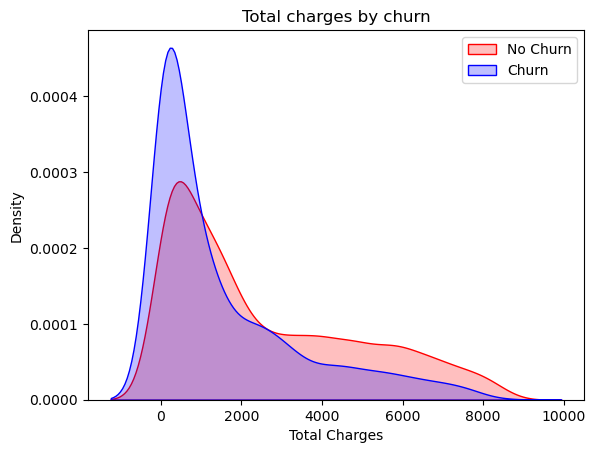

In [26]:
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

**Result**: Surprising insight, there is higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. **Tenure**, **Monthly Charges** and **Total Charges** then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.

**7.** Build a correlation of all predictors(features) with 'Churn'

StatementMeta(, ff0edbb9-2fe4-4487-99b6-183c682db9dd, 29, Finished, Available, Finished)

<Axes: >

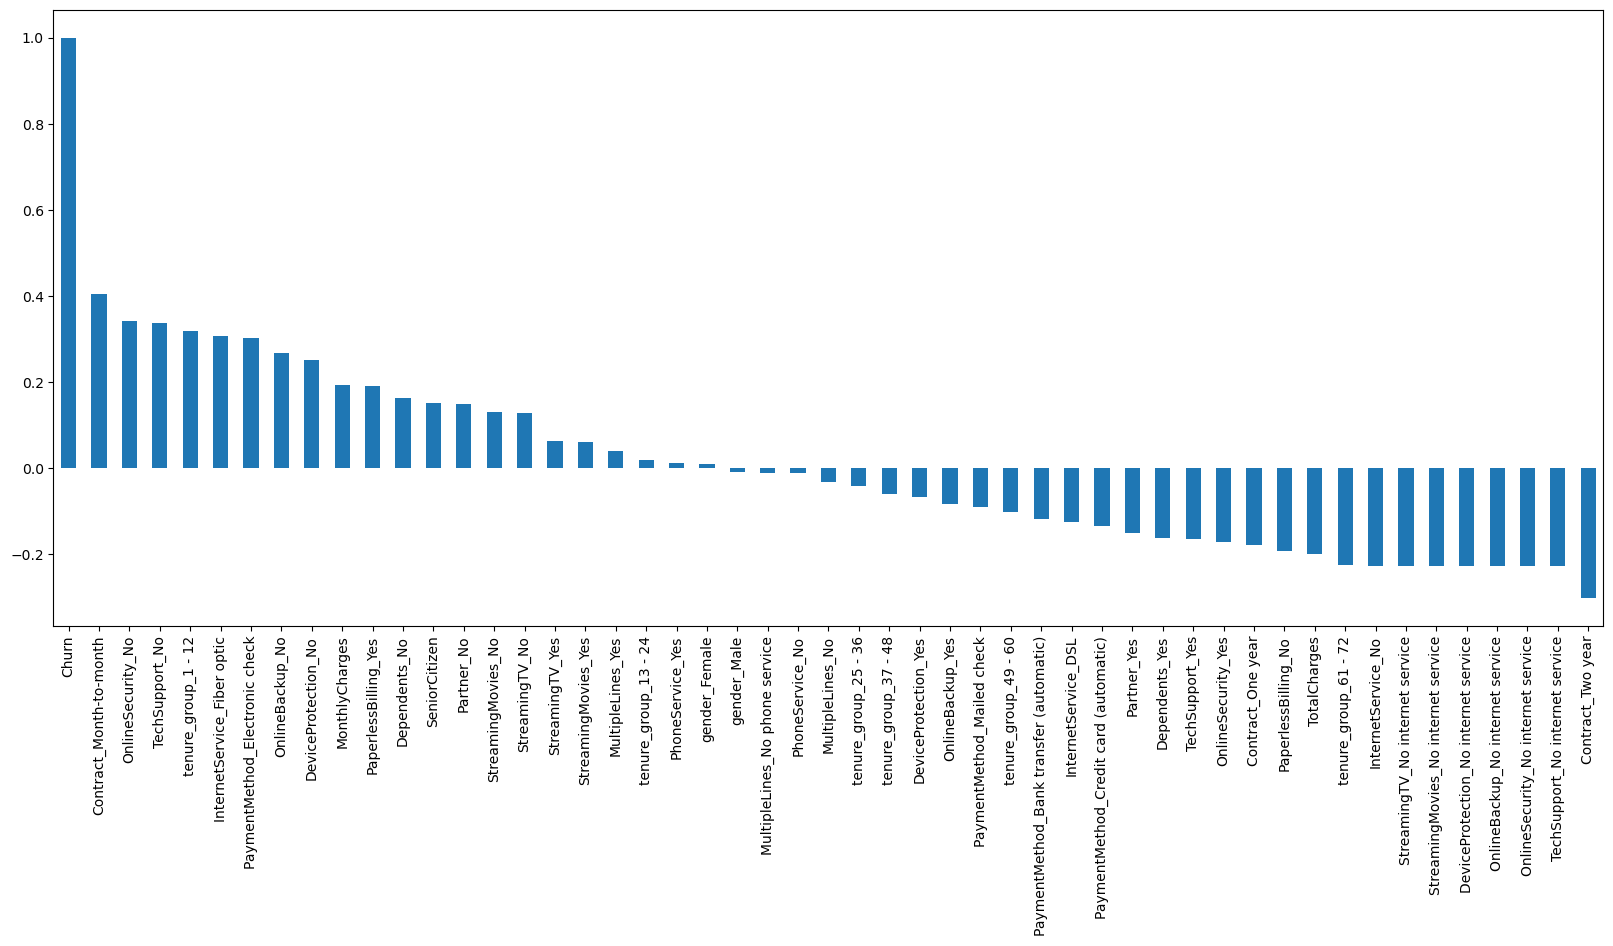

In [27]:
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

**Result:**
- HIGH Churn seen in case of **Month to month contracts**, **No online security**, **No Tech support**, **First year of subscription** and **Fibre Optics Internet**
- LOW Churn is seen in case of **Long term contracts**, **Subscriptions without internet** **service** and The **customers engaged for 5+ years**
- Factors like **Gender**, **Availability of PhoneService** and **# of multiple lines** have alomost **NO** impact on Churn.

This is also evident from the Heatmap below

StatementMeta(, ff0edbb9-2fe4-4487-99b6-183c682db9dd, 30, Finished, Available, Finished)

<Axes: >

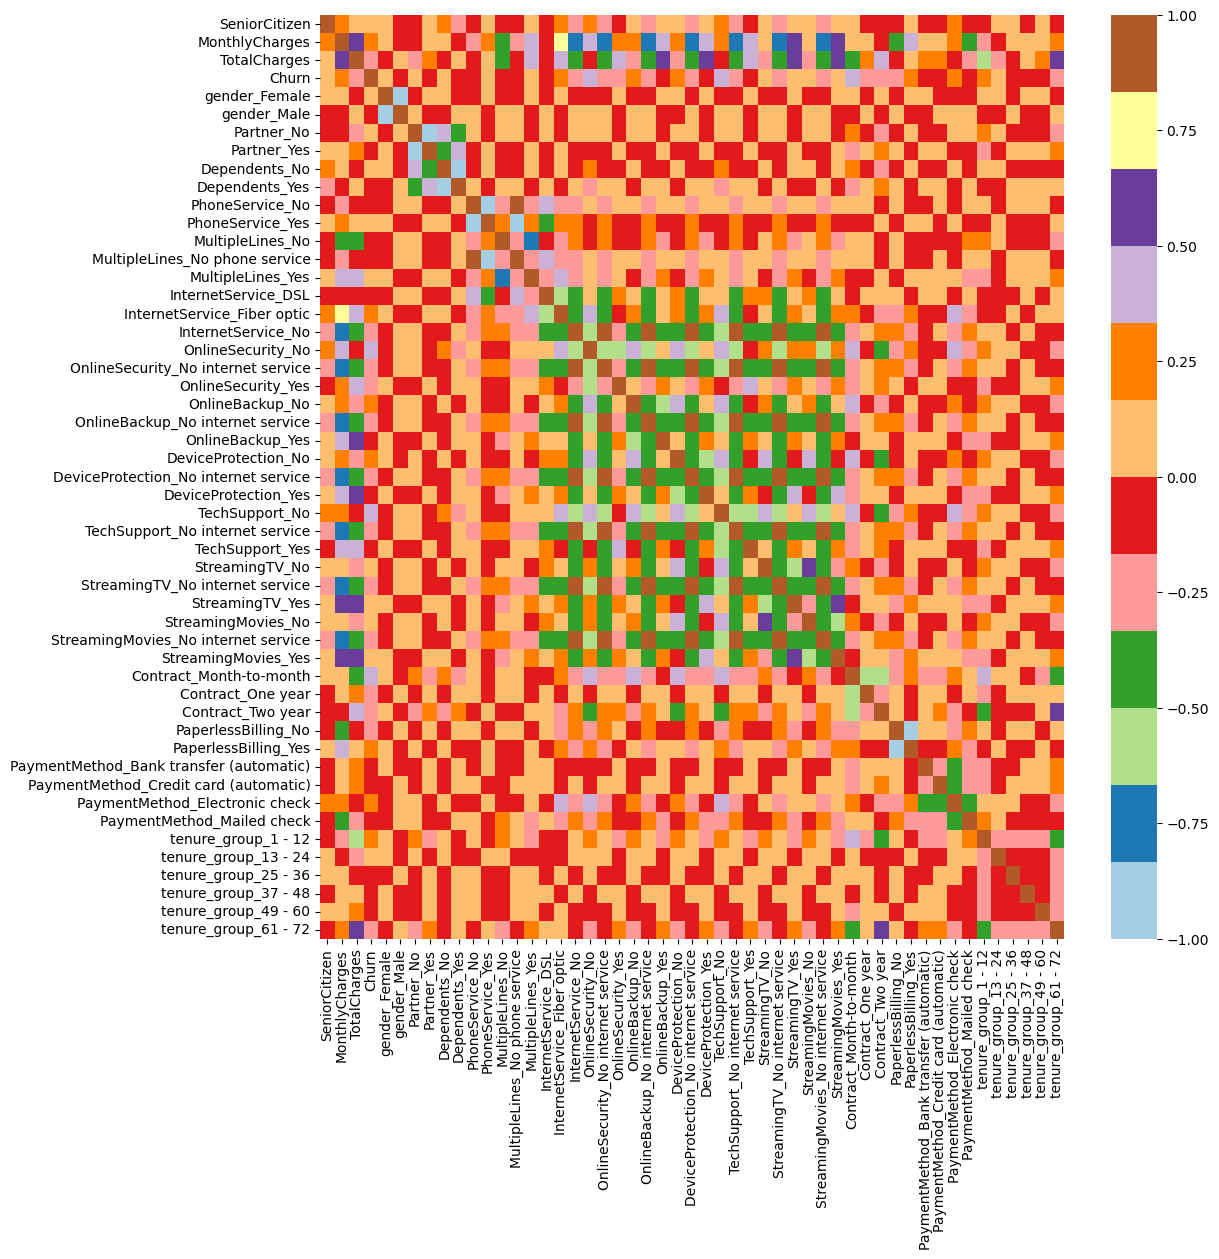

In [28]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_data_dummies.corr(), cmap="Paired")

**Bivariate Analysis**: 

This focus on the relationship between two 'features' in regards to a Label(churn) per time. Let's combine the relationship between two features and plot their distribution  predictor by Churn

*****Spliting telco_data dataframe into churners and non churners, focus will be on churners(customers that have left, reasons why they left)**

In [29]:
# Filtering the python dataframe into customers who have not churn(active customers)

new_df1_target0=telco_data.loc[telco_data["Churn"]==0]

#Filtering the python dataframe into customers who have churn(inactive customers)
new_df1_target1=telco_data.loc[telco_data["Churn"]==1]

StatementMeta(, ff0edbb9-2fe4-4487-99b6-183c682db9dd, 31, Finished, Available, Finished)

In [30]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

StatementMeta(, ff0edbb9-2fe4-4487-99b6-183c682db9dd, 32, Finished, Available, Finished)

StatementMeta(, ff0edbb9-2fe4-4487-99b6-183c682db9dd, 33, Finished, Available, Finished)

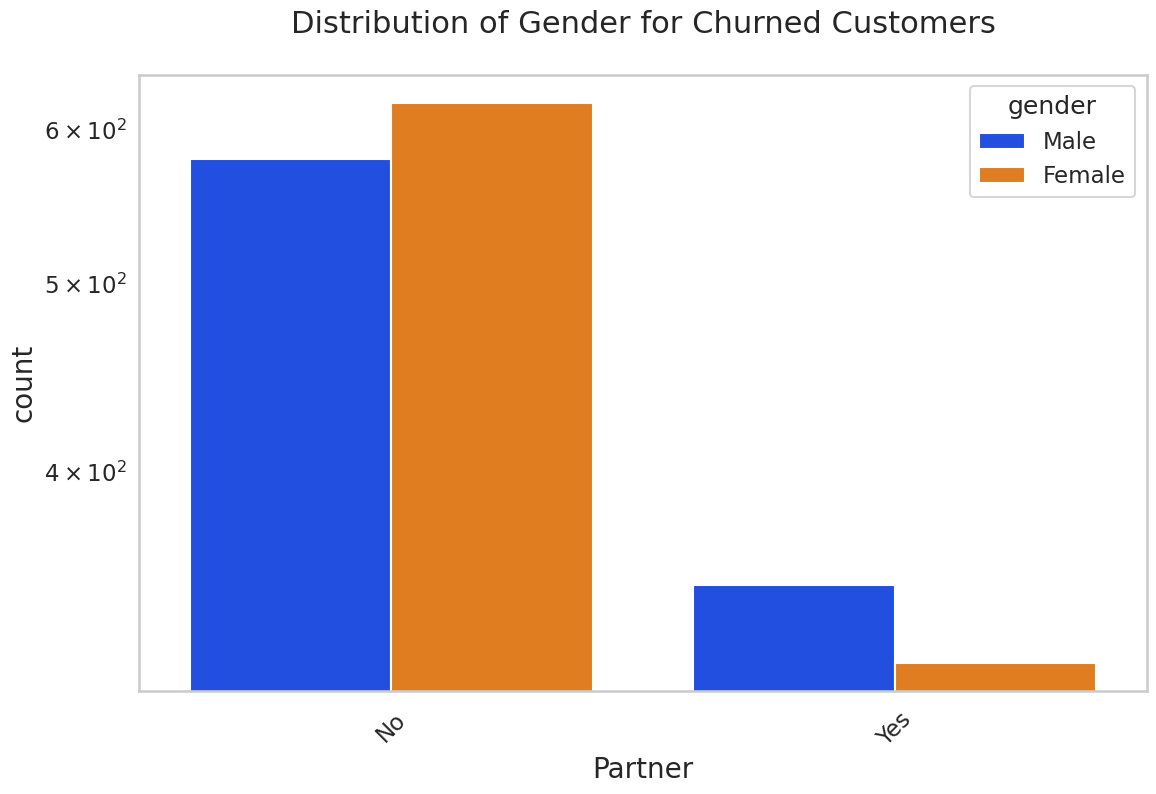

In [31]:
# Gender distribution of churned subscribers in regards to gender
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

StatementMeta(, ff0edbb9-2fe4-4487-99b6-183c682db9dd, 34, Finished, Available, Finished)

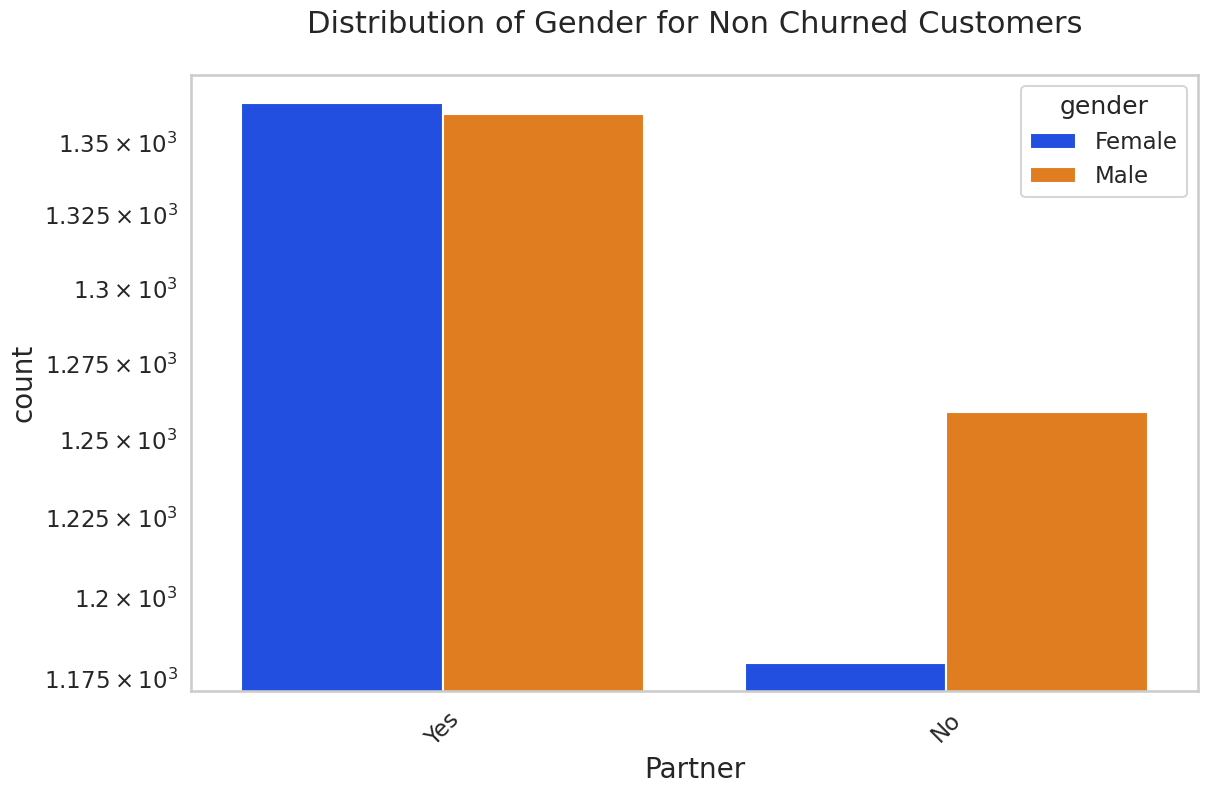

In [32]:
#Gender Distribution of non-churners(active subscribers) in regards to gender
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

StatementMeta(, ff0edbb9-2fe4-4487-99b6-183c682db9dd, 35, Finished, Available, Finished)

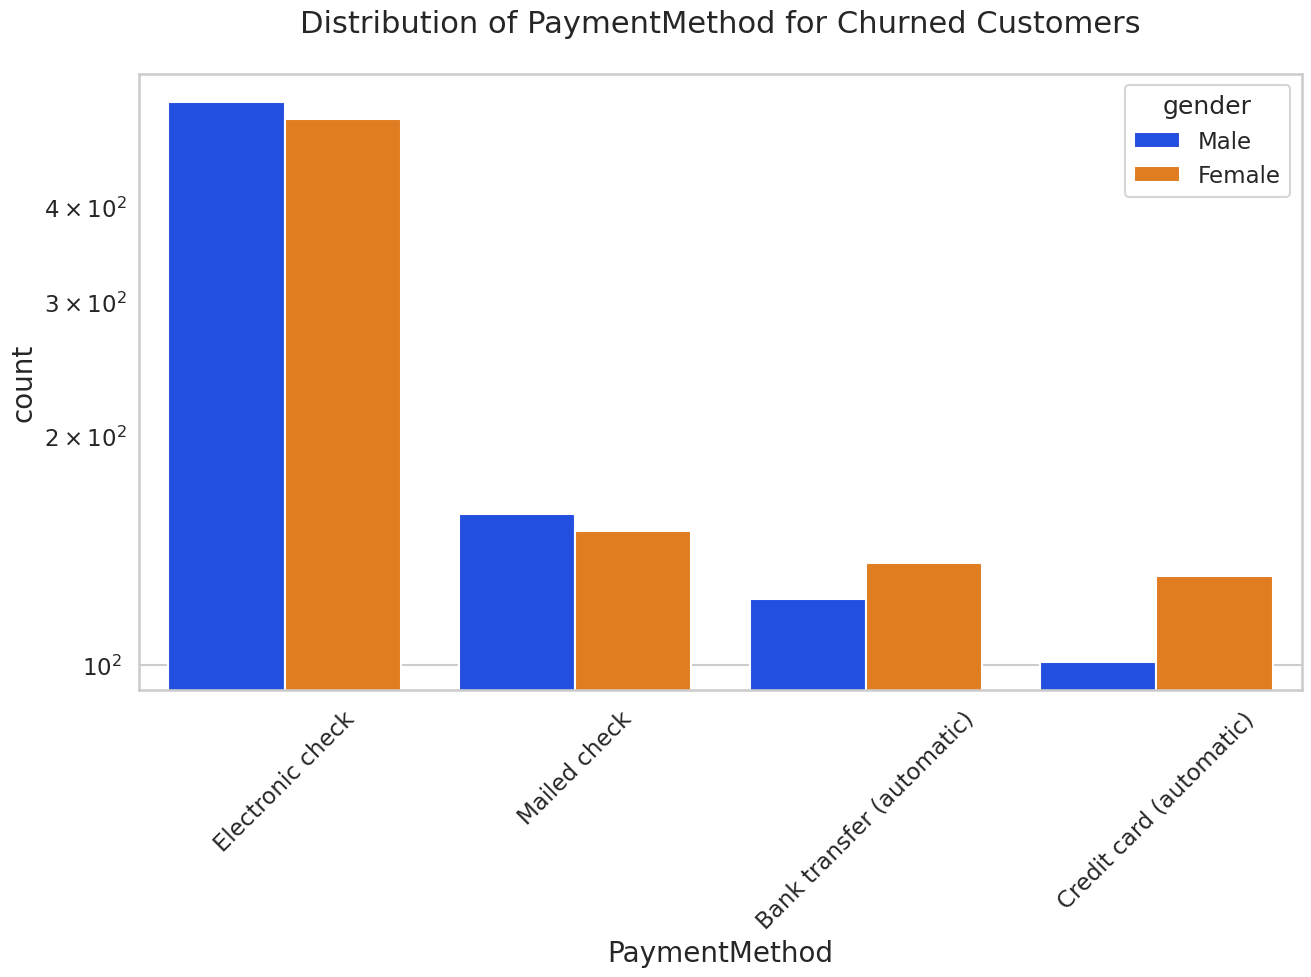

In [33]:
# Distribution of differrent payment-method for inactive subscribers(churners) in regard to gender.

uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

StatementMeta(, ff0edbb9-2fe4-4487-99b6-183c682db9dd, 36, Finished, Available, Finished)

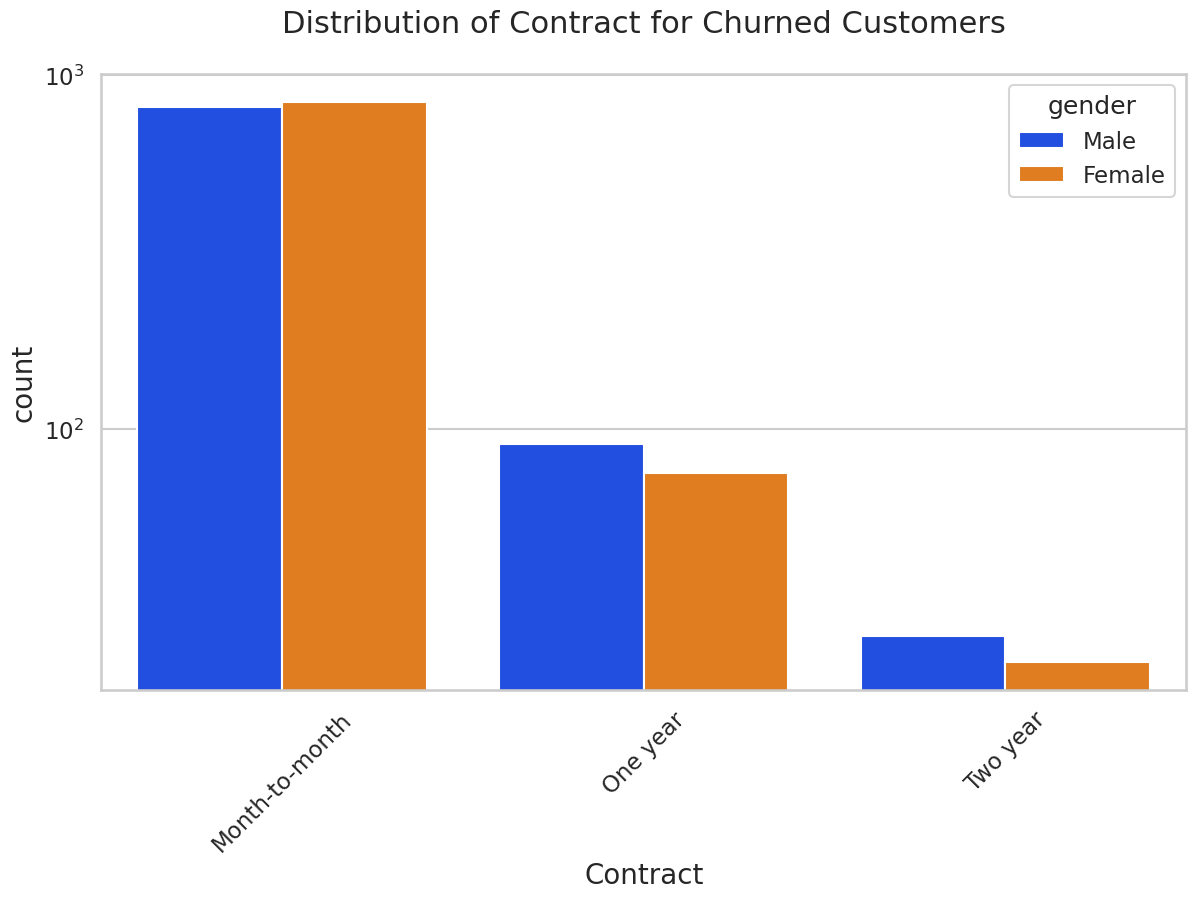

In [34]:
# Distribution of different subscription contracts of churned customers in regards to gender

uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

StatementMeta(, ff0edbb9-2fe4-4487-99b6-183c682db9dd, 37, Finished, Available, Finished)

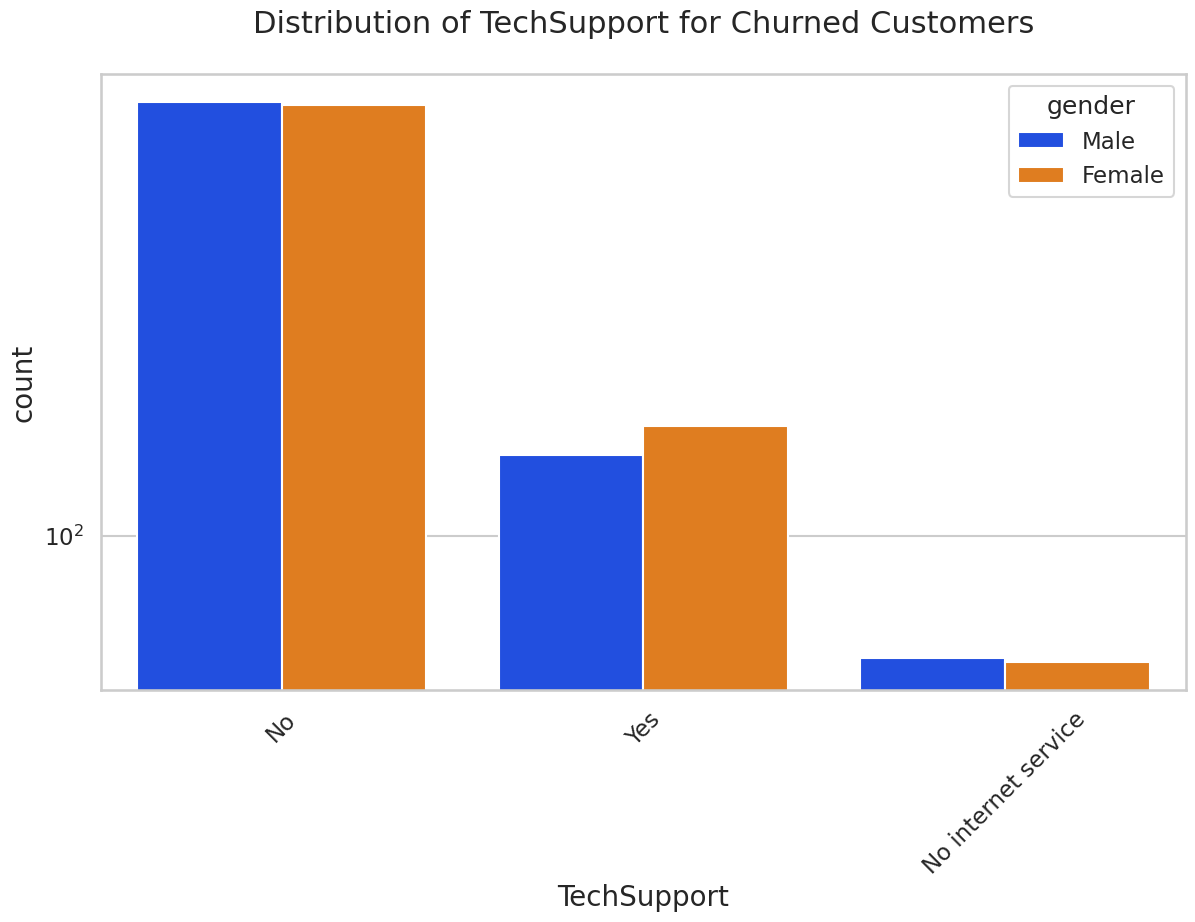

In [35]:
#Distribution of subscribers who had access to tech suppot that have left(churned) per gender 
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

StatementMeta(, ff0edbb9-2fe4-4487-99b6-183c682db9dd, 38, Finished, Available, Finished)

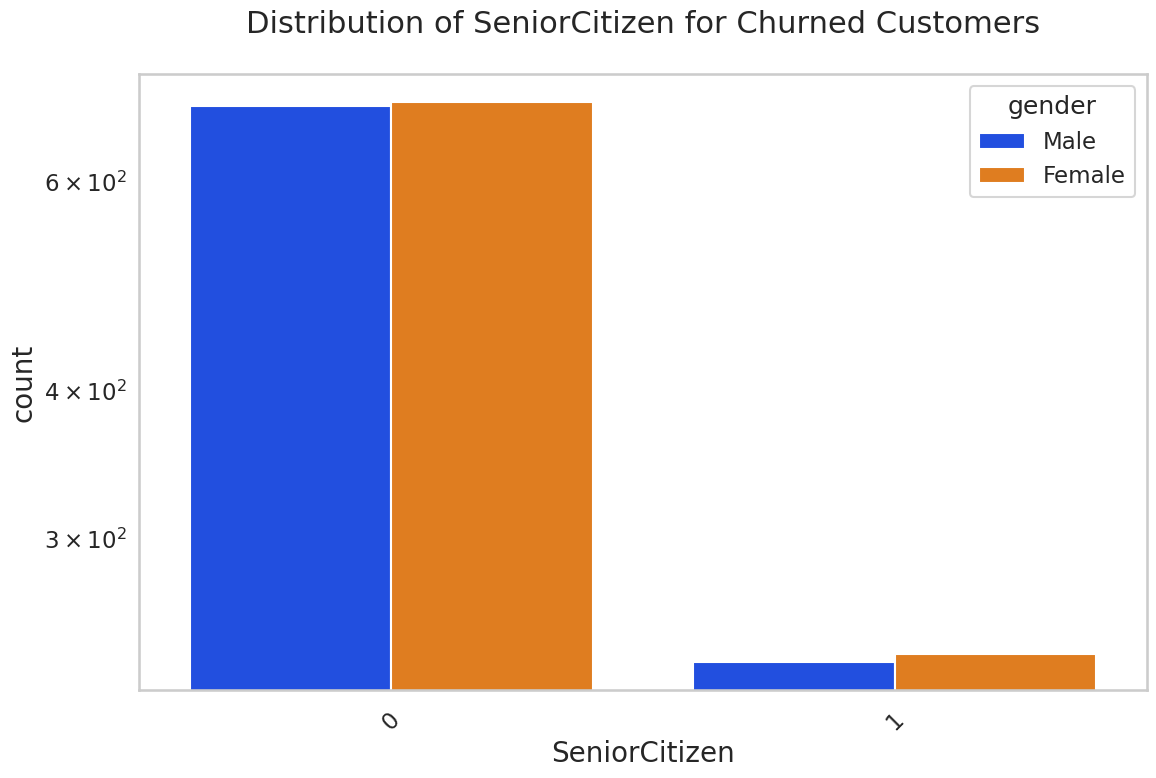

In [36]:
#Distribution of SeniorCitizens who have left(churn) per gender

uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

**CONCLUSION**
```
These are some of the quick insights from this exercise:

- Among churners, customers that used Electronic-Check payment method are the highest churners for both male and female. And we have more female churners under the category of Credit_card payment method.
- Contract Type - Customers on monthly subscription have very high frequency of churn while customers on two years contract subscription have very low frequency of churn for both male and female.
- We have high churners among customers that had no access to Tech_Support and few churners among customers that had No Internet Service for both male and female.
- Customers that are Non senior Citizens are high churners  while customers that are senior citizens are likely not to churn for both male and female.
```

##### Save telco_data_dummies as a delta table

In [37]:
# Replace invalid characters in column names
telco_data_dummies.columns = telco_data_dummies.columns.str.replace('[ ,;{}()\n\t=]', '_', regex=True)

# Convert pandas DataFrame to PySpark DataFrame
telco_data_spark = spark.createDataFrame(telco_data_dummies)

# Write the DataFrame as a Delta table
telco_data_spark.write.format("delta").mode("overwrite").saveAsTable("ABC_Telecom.clean_data")


StatementMeta(, ff0edbb9-2fe4-4487-99b6-183c682db9dd, 39, Finished, Available, Finished)